In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# World Temperature

In [2]:
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv', low_memory=False)
global_temp_country

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...          ...  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe  

[577462 rows x 4 columns]

In [3]:
global_temp_country = global_temp_country.dropna(axis=0, subset=['AverageTemperature']).reset_index(drop=True)
global_temp_country_clear = global_temp_country.drop_duplicates()
global_temp_country_clear.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [4]:
years = np.array(global_temp_country_clear['dt'].apply(lambda x: x[:4]))

global_temp_country_clear.insert(0, "Year", years, True)
global_temp_country_clear

Year          dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743  1743-11-01               4.384                          2.294   
1       1744  1744-04-01               1.530                          4.680   
2       1744  1744-05-01               6.702                          1.789   
3       1744  1744-06-01              11.609                          1.577   
4       1744  1744-07-01              15.342                          1.410   
...      ...         ...                 ...                            ...   
544806  2013  2013-04-01              21.142                          0.495   
544807  2013  2013-05-01              19.059                          1.022   
544808  2013  2013-06-01              17.613                          0.473   
544809  2013  2013-07-01              17.000                          0.453   
544810  2013  2013-08-01              19.759                          0.717   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...          ...  
544806  Zimbabwe  
544807  Zimbabwe  
544808  Zimbabwe  
544809  Zimbabwe  
544810  Zimbabwe  

[544811 rows x 5 columns]

In [5]:
data = global_temp_country_clear[['Country','Year','AverageTemperature']].groupby(['Year','Country']).mean().sort_values('Year').reset_index()
px.choropleth(data_frame=data,locationmode='country names',locations='Country',color='AverageTemperature',animation_frame='Year' ,title="Earth temperatures between 1973 and 2013", projection="orthographic")

In [6]:
countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == country]['AverageTemperature'].mean())
 
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Average Temperature, °C')
            )
       ]

layout = dict(
    title = 'Average Land Temperature In Countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
          ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [7]:
global_temp = pd.read_csv("GlobalTemperatures.csv", low_memory=False)
global_temp

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  
...                                         ...  
3187                                      0.057  
3188                                      0.058  
3189                                      0.062  
3190                                      0.063  
3191                                      0.062  

[3192 rows x 9 columns]

In [8]:
global_temp = global_temp.dropna(axis=0, subset=['LandAverageTemperature','LandAverageTemperatureUncertainty']).reset_index(drop=True)
global_temp = global_temp.drop_duplicates()
global_temp.isnull().sum()

dt                                              0
LandAverageTemperature                          0
LandAverageTemperatureUncertainty               0
LandMaxTemperature                           1188
LandMaxTemperatureUncertainty                1188
LandMinTemperature                           1188
LandMinTemperatureUncertainty                1188
LandAndOceanAverageTemperature               1188
LandAndOceanAverageTemperatureUncertainty    1188
dtype: int64

In [9]:
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

data0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
data1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

data2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(255, 0, 0)',
    )
)
data = [data0, data1, data2]

layout = go.Layout(
    width=600,
    height=500,
    xaxis=dict(title='Years'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average Land Temperature In World',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
fig.show()

# Regression Models

In [10]:
from sklearn.model_selection import train_test_split

X = years.reshape(-1, 1)
y = mean_temp_world

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))

Mean Absolute Error: 0.3851289927319212
Mean Squared Error: 0.23637614085817743


In [13]:
temp_pred = model.predict([[2050]])

print('In 2050 predicted average temperature:', temp_pred[0])

In 2050 predicted average temperature: 9.209975952167857


In [14]:
x = years.tolist()
x= [eval(i) for i in x]
y = mean_temp_world

curve = np.polyfit(x, y, 1)
poly = np.poly1d(curve)

print(poly)

 
0.004732 x - 0.5381


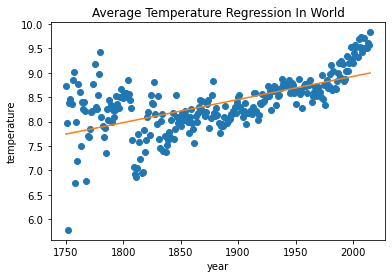

In [15]:
plt.plot(x, y, 'o')
plt.plot(x, poly(x))
plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Average Temperature Regression In World')
plt.show()

In [16]:
from sklearn.metrics import r2_score

rsquared_linear = r2_score(y, poly(x))

print(rsquared_linear)

0.3873026972956113


In [17]:
print('In 2050 predicted average temperature:', poly(2050))

In 2050 predicted average temperature: 9.16189553288605


In [18]:
x = years.tolist()
x= [eval(i) for i in x]
y = mean_temp_world

curve = np.polyfit(x, y, 2)
poly = np.poly1d(curve)

print(poly)

           2
4.194e-05 x - 0.1532 x + 147.9


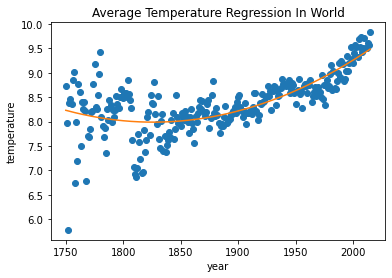

In [19]:
plt.plot(x, y, 'o')
plt.plot(x, poly(x))
plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Average Temperature Regression In World')
plt.show()

In [20]:
from sklearn.metrics import r2_score

rsquared_linear = r2_score(y, poly(x))

print(rsquared_linear)

0.530850622565942


In [21]:
print('In 2050 predicted average temperature:', poly(2050))

In 2050 predicted average temperature: 10.091366213393087


# Turkey Temperature

In [22]:
turkey_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
turkey_temp=turkey_temp.loc[turkey_temp['Country'] == 'Turkey']
turkey_temp

dt  AverageTemperature  AverageTemperatureUncertainty Country
533683  1777-02-01               3.000                          3.314  Turkey
533684  1777-03-01                 NaN                            NaN  Turkey
533685  1777-04-01               7.678                          2.553  Turkey
533686  1777-05-01              15.293                          3.189  Turkey
533687  1777-06-01              18.661                          2.993  Turkey
...            ...                 ...                            ...     ...
536518  2013-05-01              17.522                          0.360  Turkey
536519  2013-06-01              20.862                          0.240  Turkey
536520  2013-07-01              23.335                          0.281  Turkey
536521  2013-08-01              23.839                          0.306  Turkey
536522  2013-09-01                 NaN                            NaN  Turkey

[2840 rows x 4 columns]

In [23]:
turkey_temp = turkey_temp.dropna(axis=0, subset=['AverageTemperature','AverageTemperatureUncertainty']).reset_index(drop=True)
turkey_temp = turkey_temp.drop_duplicates()
turkey_temp.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [24]:
years = np.unique(turkey_temp['dt'].apply(lambda x: x[:4]))
mean_temp_turkey = []
mean_temp_turkey_uncertainty = []

for year in years:
    mean_temp_turkey.append(turkey_temp[turkey_temp['dt'].apply(lambda x: x[:4]) == year]['AverageTemperature'].mean())
    mean_temp_turkey_uncertainty.append(turkey_temp[turkey_temp['dt'].apply(lambda x: x[:4]) == year]['AverageTemperatureUncertainty'].mean())

data0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_turkey) + np.array(mean_temp_turkey_uncertainty),
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
data1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_turkey) - np.array(mean_temp_turkey_uncertainty),
    fill='tonexty',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

data2 = go.Scatter(
    x = years, 
    y = mean_temp_turkey,
    name='Average Temperature',
    line=dict(
        color='rgb(255, 0, 0)',
    )
)
data = [data0, data1, data2]

layout = go.Layout(
    width=600,
    height=500,
    xaxis=dict(title='Years'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average Temperature In Turkey',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
fig.show()

# Continent Temperature

In [25]:
continent_temp = pd.read_csv('city_temperature.csv', low_memory=False)
continent_temp

Region  Country                   State                  City  \
0               Africa  Algeria                     NaN               Algiers   
1               Africa  Algeria                     NaN               Algiers   
2               Africa  Algeria                     NaN               Algiers   
3               Africa  Algeria                     NaN               Algiers   
4               Africa  Algeria                     NaN               Algiers   
...                ...      ...                     ...                   ...   
2906322  North America       US  Additional Territories  San Juan Puerto Rico   
2906323  North America       US  Additional Territories  San Juan Puerto Rico   
2906324  North America       US  Additional Territories  San Juan Puerto Rico   
2906325  North America       US  Additional Territories  San Juan Puerto Rico   
2906326  North America       US  Additional Territories  San Juan Puerto Rico   

         Month  Day  Year  AvgTemperature  
0            1    1  1995            64.2  
1            1    2  1995            49.4  
2            1    3  1995            48.8  
3            1    4  1995            46.4  
4            1    5  1995            47.9  
...        ...  ...   ...             ...  
2906322      7   27  2013            82.4  
2906323      7   28  2013            81.6  
2906324      7   29  2013            84.2  
2906325      7   30  2013            83.8  
2906326      7   31  2013            83.6  

[2906327 rows x 8 columns]

In [26]:
temp = np.unique(continent_temp['AvgTemperature'])
temp

array([-99. , -50. , -49.1, ..., 109.8, 109.9, 110. ])

In [27]:
# Changing temperature from Farenheit to Celsius
continent_temp['AvgTemperature']= (continent_temp.AvgTemperature-32)*5/9

temp = np.unique(continent_temp['AvgTemperature'])
temp

array([-72.77777778, -45.55555556, -45.05555556, ...,  43.22222222,
        43.27777778,  43.33333333])

In [28]:
years = np.unique(continent_temp['Year'])
years

array([ 200,  201, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [29]:
continent_temp = continent_temp[continent_temp['Year'] > 1990]
years = np.unique(continent_temp['Year'])
years

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020], dtype=int64)

In [30]:
continent = np.unique(continent_temp['Region'])
continent

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

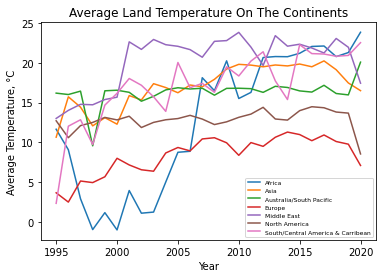

In [31]:
# Calculate mean temperature for each continent and year
mean_temp = (
    continent_temp.groupby(['Region', 'Year'])['AvgTemperature']
    .mean()
    .reset_index()
    .pivot(index='Year', columns='Region', values='AvgTemperature')
)

# Plot the mean temperature for each continent
fig, ax = plt.subplots()
for col in mean_temp.columns:
    mean_temp[col].plot(ax=ax, label=col)
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature, °C')
ax.set_title('Average Land Temperature On The Continents')
ax.legend(loc=4, prop={'size': 6})
plt.show()
